# Pokemon Correlation Analysis

This notebook analyzes relationships between different variables in the Pokemon dataset, focusing on correlations between stats, types, and other characteristics. Visualizations highlight key relationships and insights for the presentation.

## Setup and Data Loading

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# prevent results from being clipped
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# set up consistent color palette across all notebooks
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
presentation_palette = sns.color_palette("Set2")  # 8 colors available

# load the pokemon dataset
df = pd.read_csv('Pokemon Database.csv')
print(f"dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

# define stat columns for correlation analysis
stats_cols = ['Health Stat', 'Attack Stat', 'Defense Stat', 'Special Attack Stat', 'Special Defense Stat', 'Speed Stat']

dataset loaded: 1382 rows, 45 columns


In [22]:
# check primary type values for quotes
print("sample primary types:")
print(df['Primary Type'].unique()[:10])

sample primary types:
['"Grass"' '"Fire"' '"Water"' '"Bug"' '"Normal"' '"Dark"' '"Poison"'
 '"Electric"' '"Ground"' '"Ice"']


## Base Stats Correlation Analysis

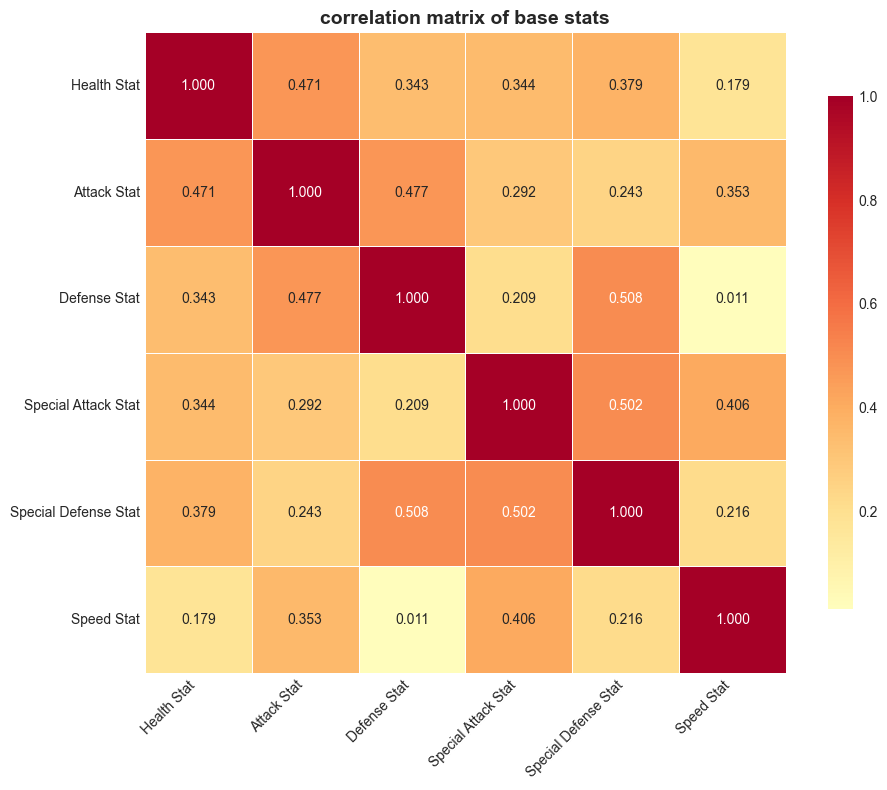

strongest positive correlations (|r| > 0.4):


In [23]:
# calculate correlation matrix for base stats
stats_corr = df[stats_cols].corr()

# create correlation heatmap - show full matrix
plt.figure(figsize=(10, 8))
sns.heatmap(stats_corr, annot=True, cmap='RdYlBu_r', center=0,
            fmt='.3f', square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('correlation matrix of base stats', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('figures/correlation/base_stats_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# print strongest correlations (adjusted threshold since none > 0.5)
print("strongest positive correlations (|r| > 0.4):")
correlations = []
for i in range(len(stats_cols)):
    for j in range(i+1, len(stats_cols)):
        corr_val = stats_corr.iloc[i, j]
        if abs(corr_val) > 0.4:
            correlations.append((stats_cols[i], stats_cols[j], corr_val))

## Key Stat Relationships

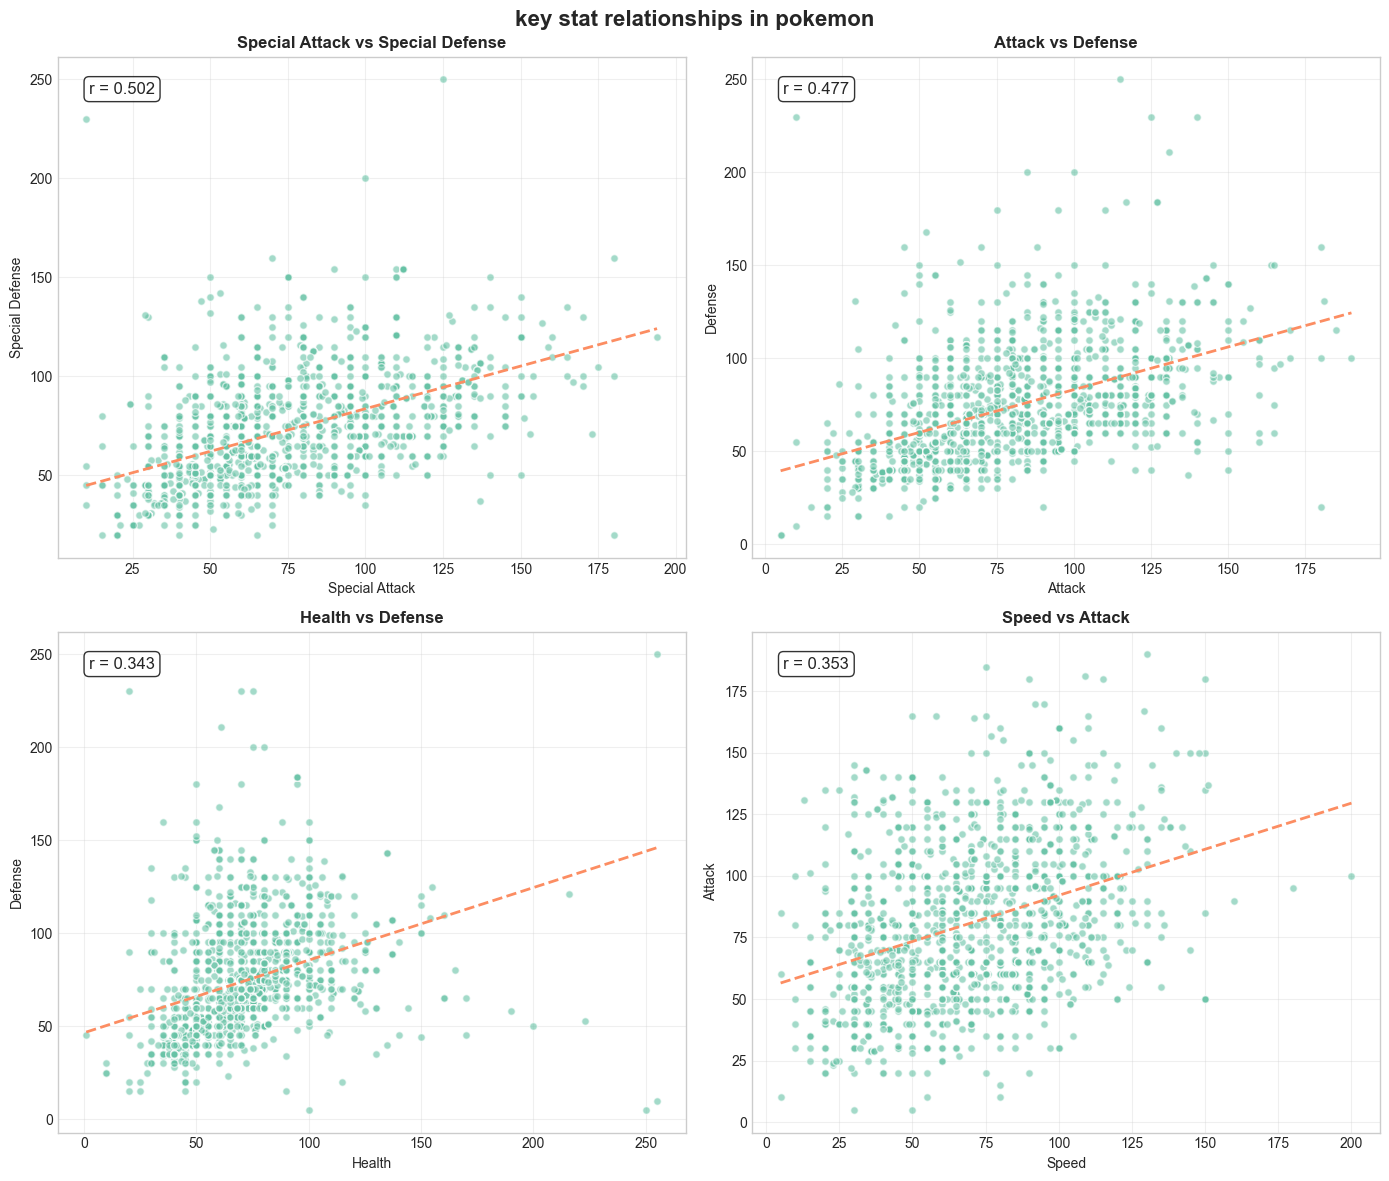

key relationship insights
• Special Attack vs Special Defense: moderate positive correlation (r = 0.502)
• Attack vs Defense: weak positive correlation (r = 0.477)
• Health vs Defense: weak positive correlation (r = 0.343)
• Speed vs Attack: weak positive correlation (r = 0.353)

• special attack/defense pairing shows the strongest relationship
• speed is relatively independent of other stats
• physical stats (attack/defense) show moderate correlation


In [24]:
# create scatter plots for key relationships
key_pairs = [
    ('Special Attack Stat', 'Special Defense Stat'),
    ('Attack Stat', 'Defense Stat'),
    ('Health Stat', 'Defense Stat'),
    ('Speed Stat', 'Attack Stat')
]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('key stat relationships in pokemon', fontsize=16, fontweight='bold')

for i, (x_stat, y_stat) in enumerate(key_pairs):
    row, col = i // 2, i % 2

    # scatter plot
    axes[row, col].scatter(df[x_stat], df[y_stat], alpha=0.6, color=presentation_palette[0], s=30, edgecolors='white')

    # add trend line
    z = np.polyfit(df[x_stat], df[y_stat], 1)
    p = np.poly1d(z)
    x_trend = np.linspace(df[x_stat].min(), df[x_stat].max(), 100)
    axes[row, col].plot(x_trend, p(x_trend), color=presentation_palette[1], linewidth=2, linestyle='--')

    # calculate and display correlation
    corr = df[x_stat].corr(df[y_stat])
    axes[row, col].text(0.05, 0.95, f'r = {corr:.3f}',
                       transform=axes[row, col].transAxes, fontsize=12,
                       verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    axes[row, col].set_xlabel(x_stat.replace(' Stat', ''))
    axes[row, col].set_ylabel(y_stat.replace(' Stat', ''))
    axes[row, col].set_title(f'{x_stat[:-5]} vs {y_stat[:-5]}', fontweight='bold')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/correlation/key_stat_relationships_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

# analysis of relationships
print("key relationship insights")
for x_stat, y_stat in key_pairs:
    corr = df[x_stat].corr(df[y_stat])
    strength = "strong" if abs(corr) > 0.7 else "moderate" if abs(corr) > 0.5 else "weak"
    direction = "positive" if corr > 0 else "negative"
    print(f"• {x_stat[:-5]} vs {y_stat[:-5]}: {strength} {direction} correlation (r = {corr:.3f})")

print(f"\n• special attack/defense pairing shows the strongest relationship")
print(f"• speed is relatively independent of other stats")
print(f"• physical stats (attack/defense) show moderate correlation")

## Type vs Stats Relationships

single-type pokemon: 630
dual-type pokemon: 752

single-type pokemon: average stats by type


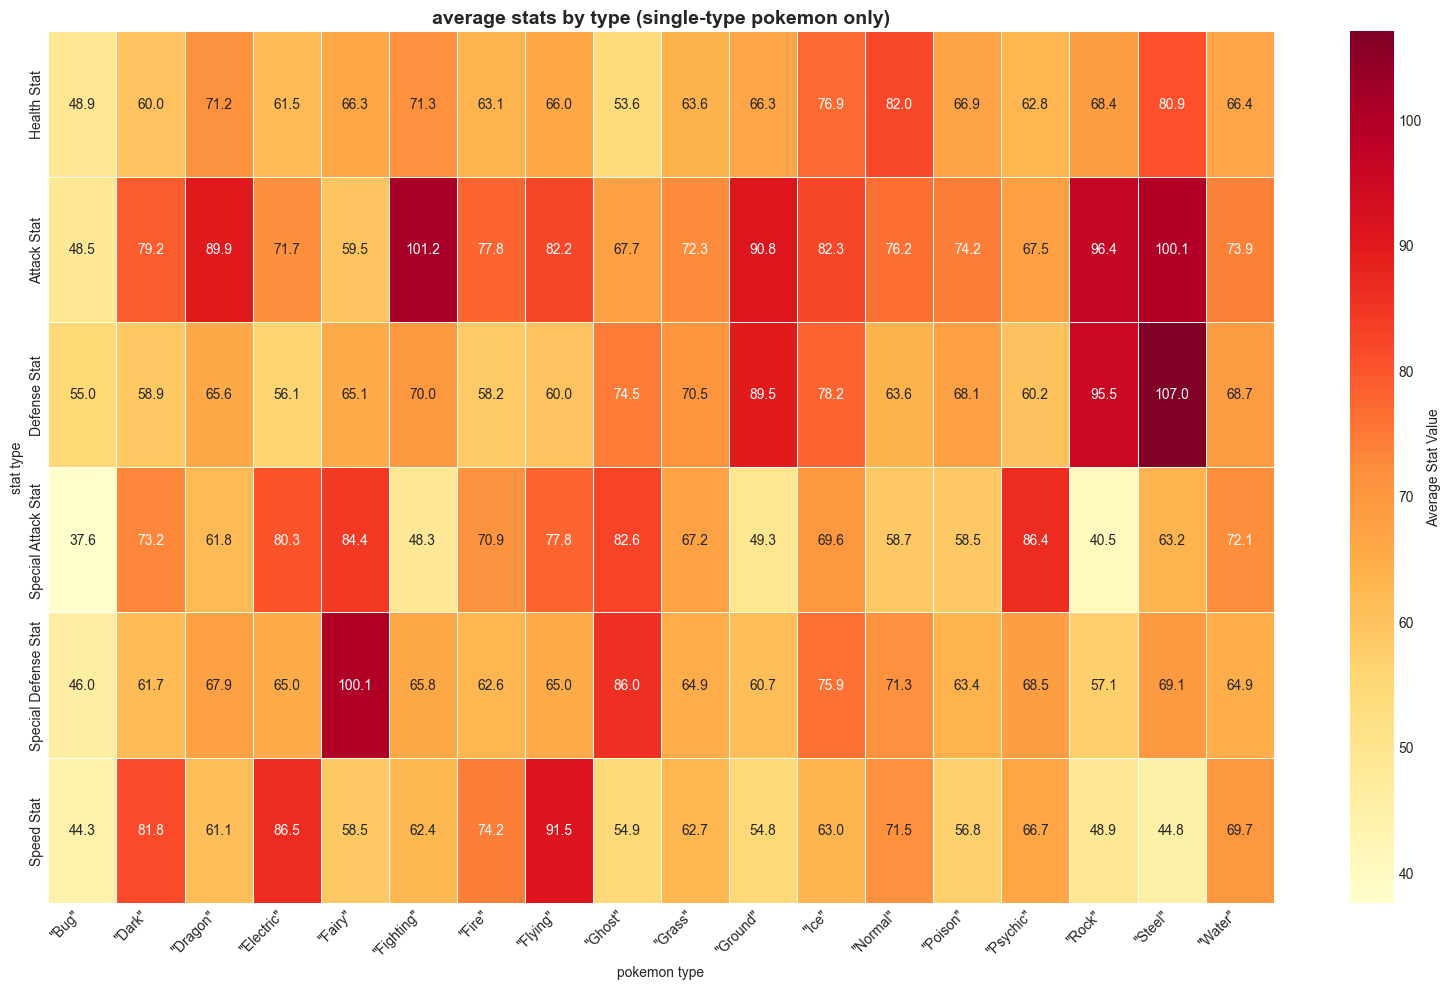


dual-type pokemon: stats by type combination


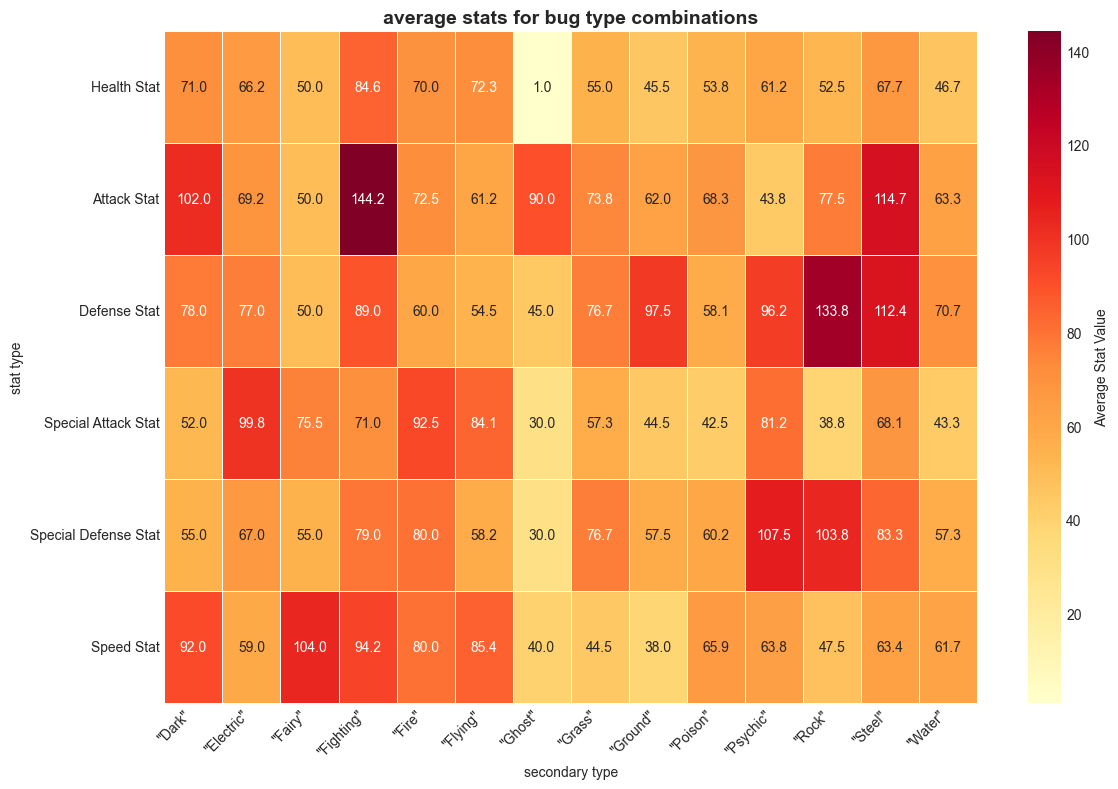

bug combinations: 14 secondary types
  highest average total stats: bug + fighting



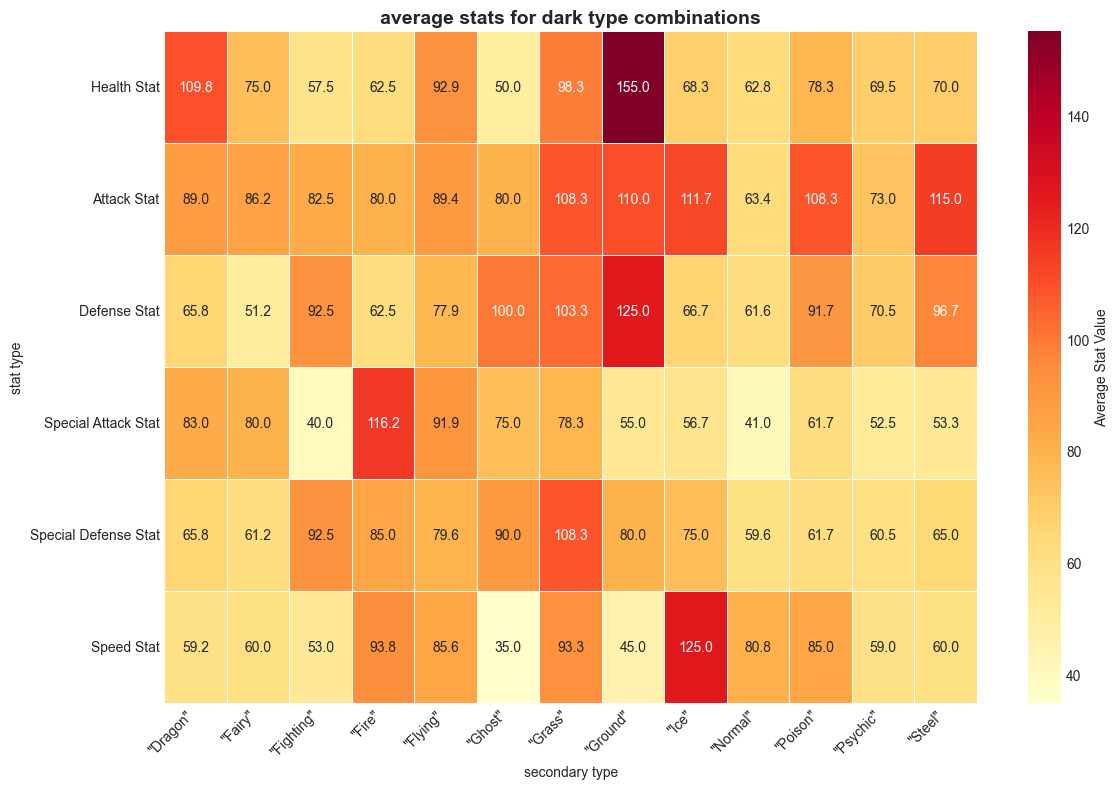

dark combinations: 13 secondary types
  highest average total stats: dark + grass



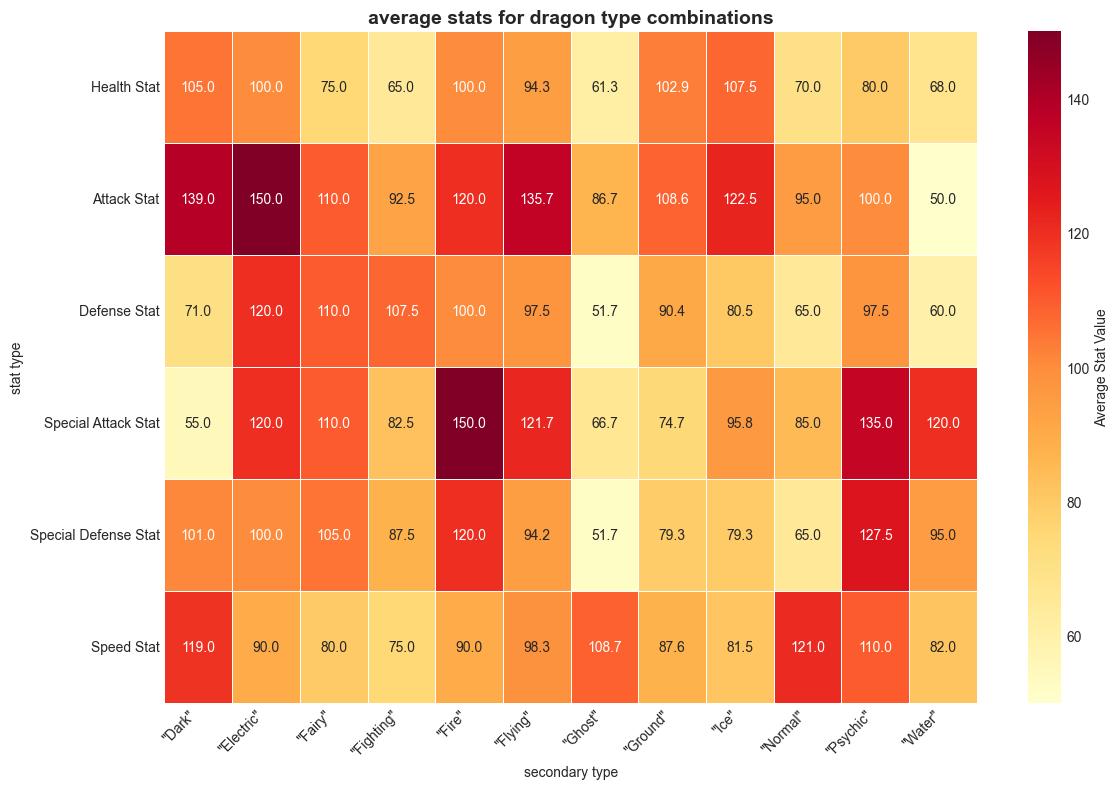

dragon combinations: 12 secondary types
  highest average total stats: dragon + electric



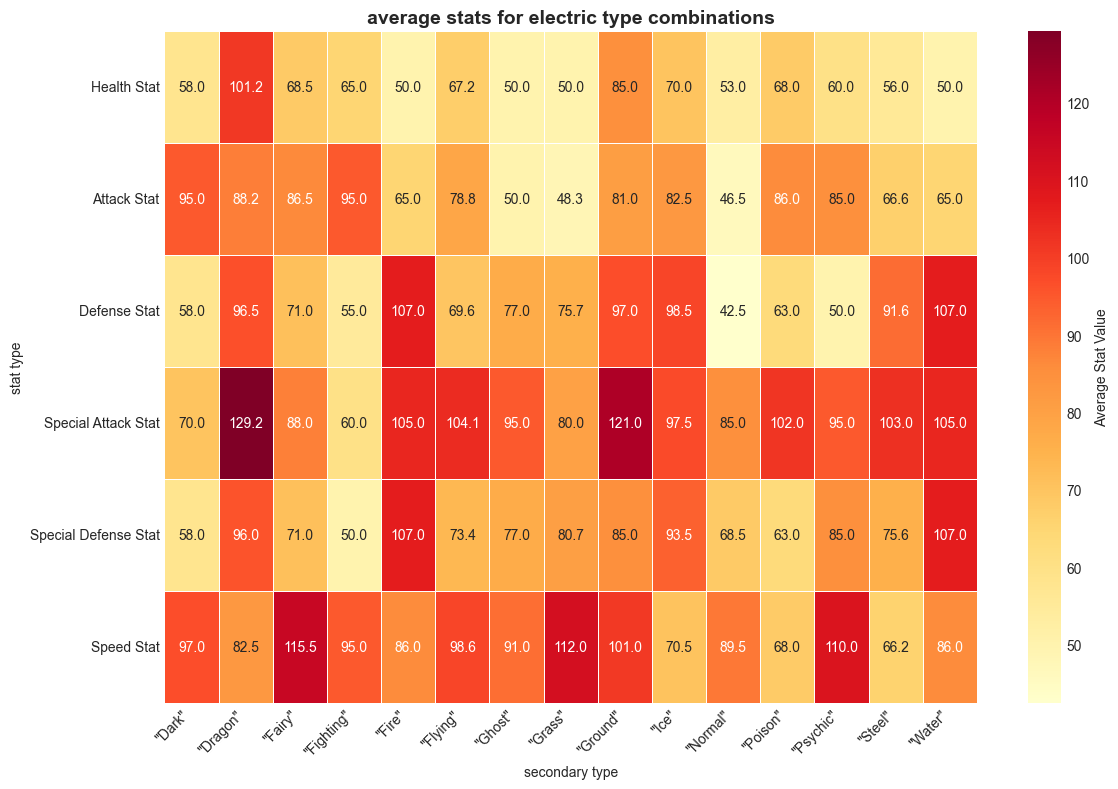

electric combinations: 15 secondary types
  highest average total stats: electric + dragon



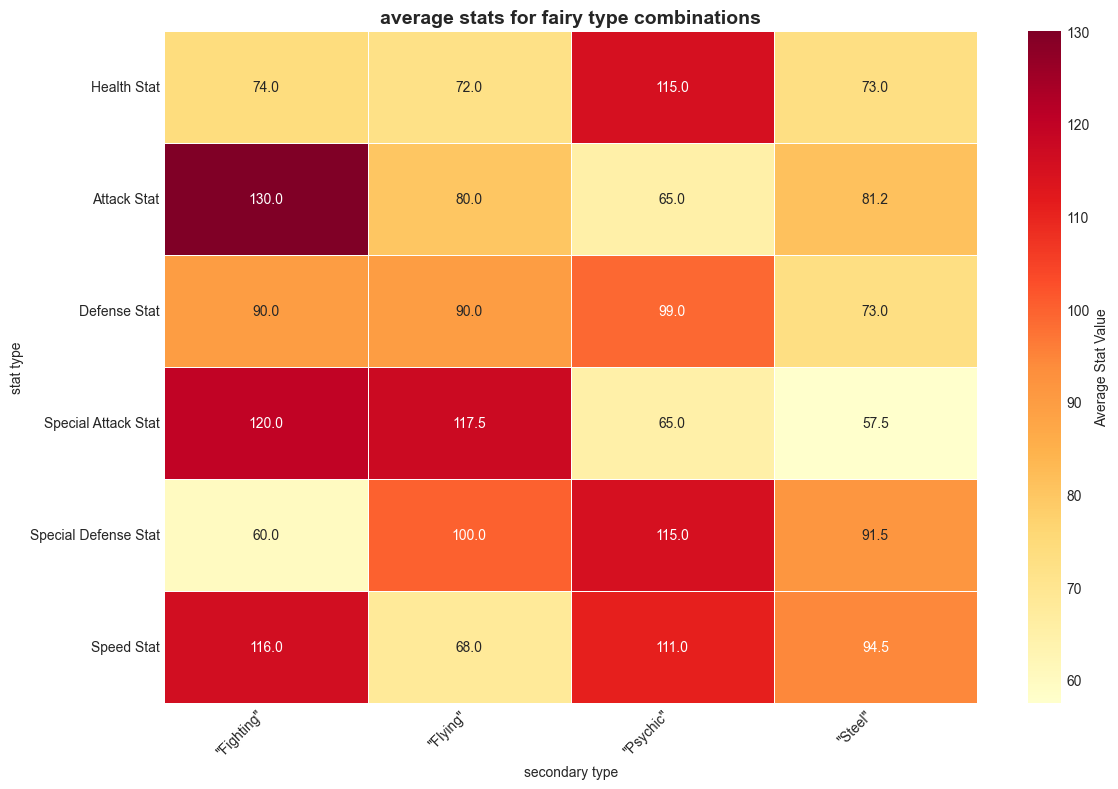

fairy combinations: 4 secondary types
  highest average total stats: fairy + fighting



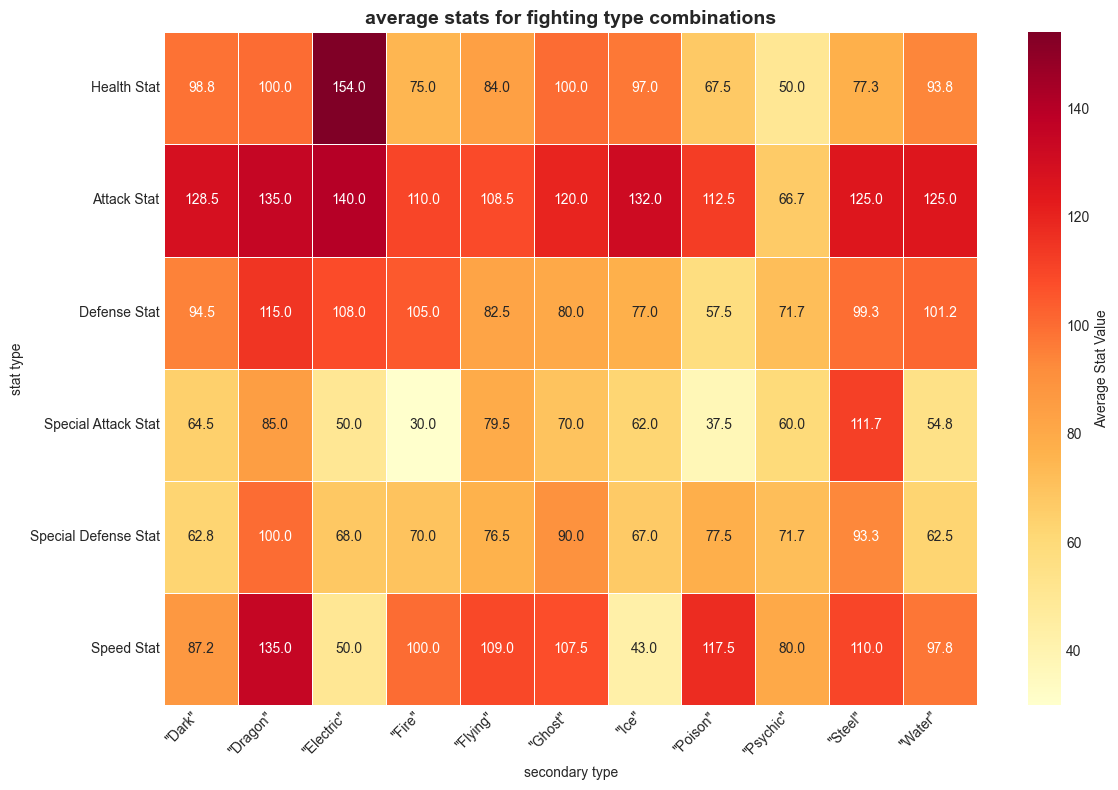

fighting combinations: 11 secondary types
  highest average total stats: fighting + dragon



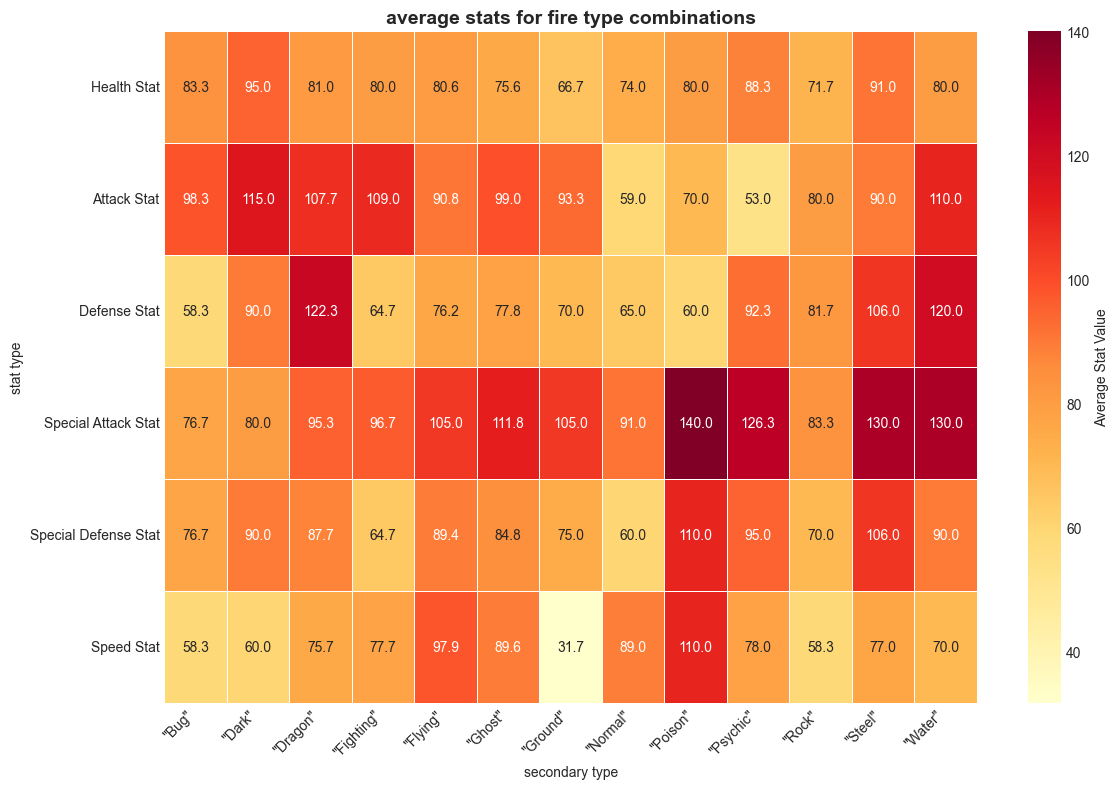

fire combinations: 13 secondary types
  highest average total stats: fire + steel



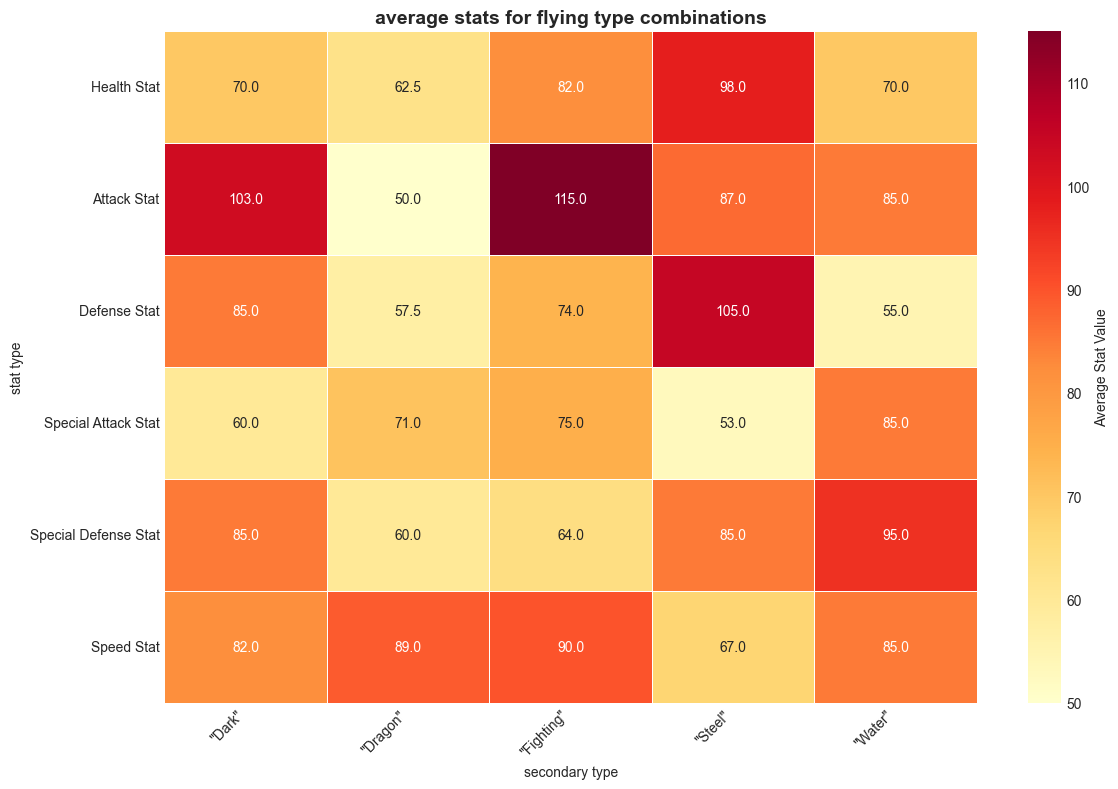

flying combinations: 5 secondary types
  highest average total stats: flying + fighting



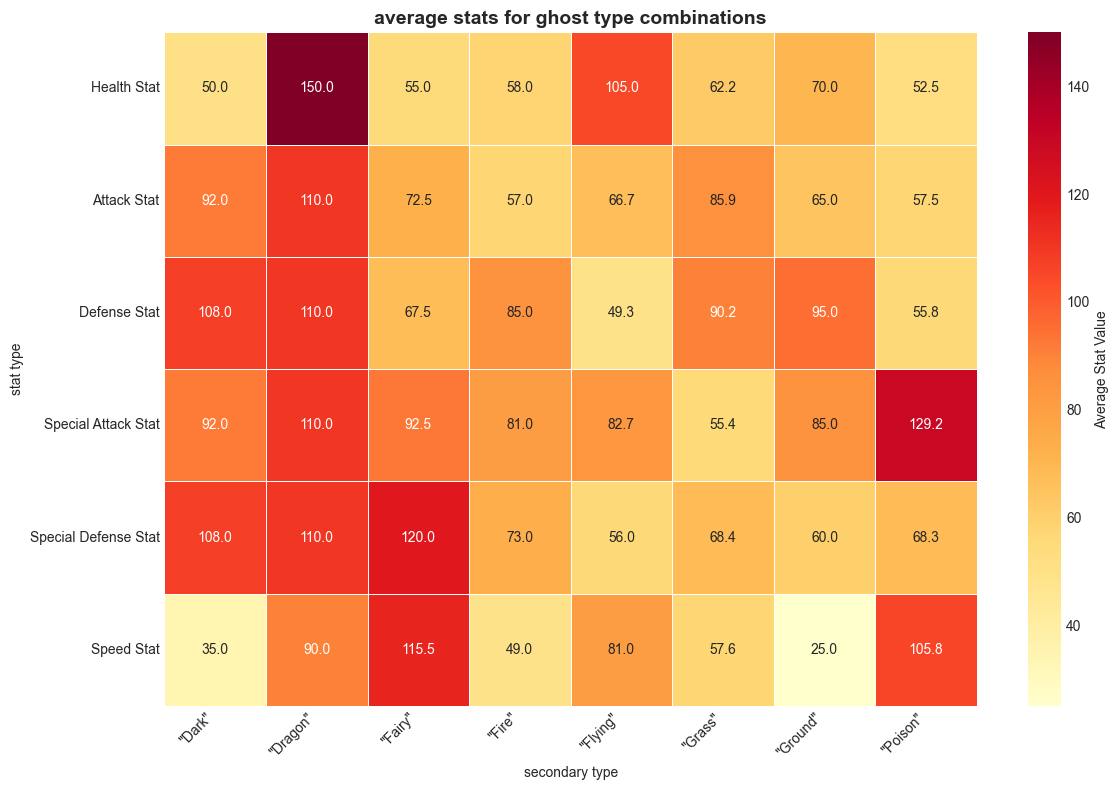

ghost combinations: 8 secondary types
  highest average total stats: ghost + dragon



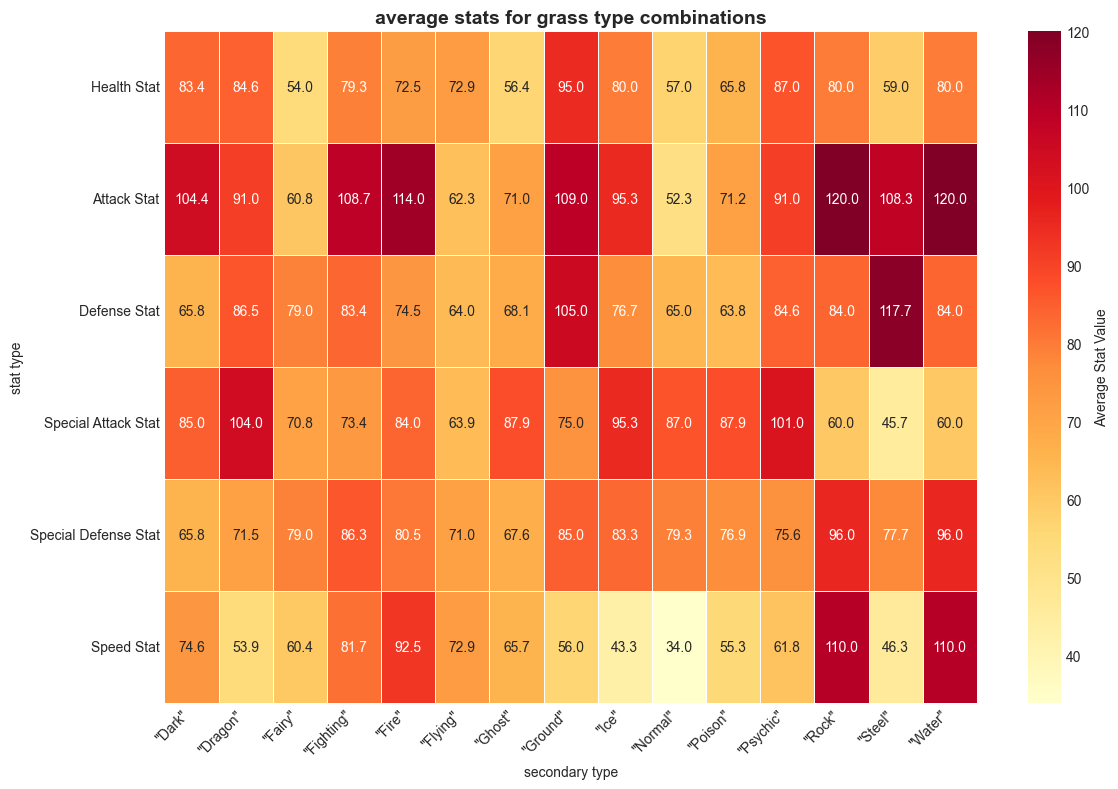

grass combinations: 15 secondary types
  highest average total stats: grass + rock



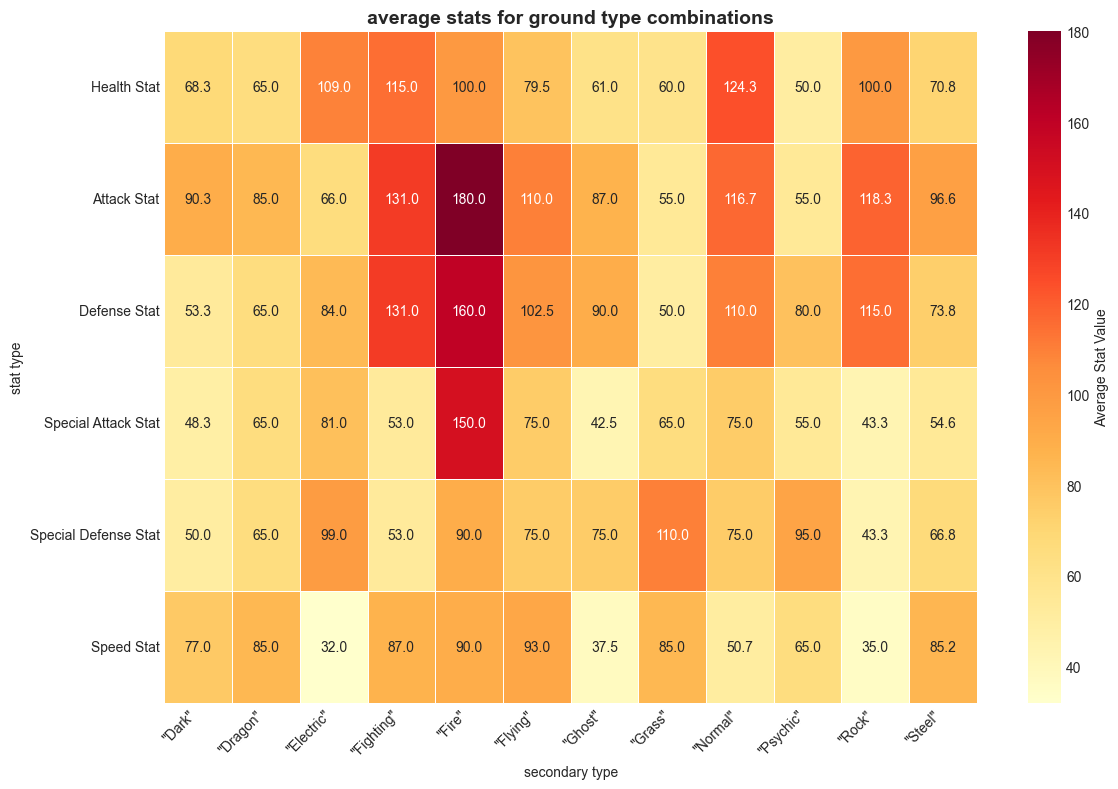

ground combinations: 12 secondary types
  highest average total stats: ground + fire



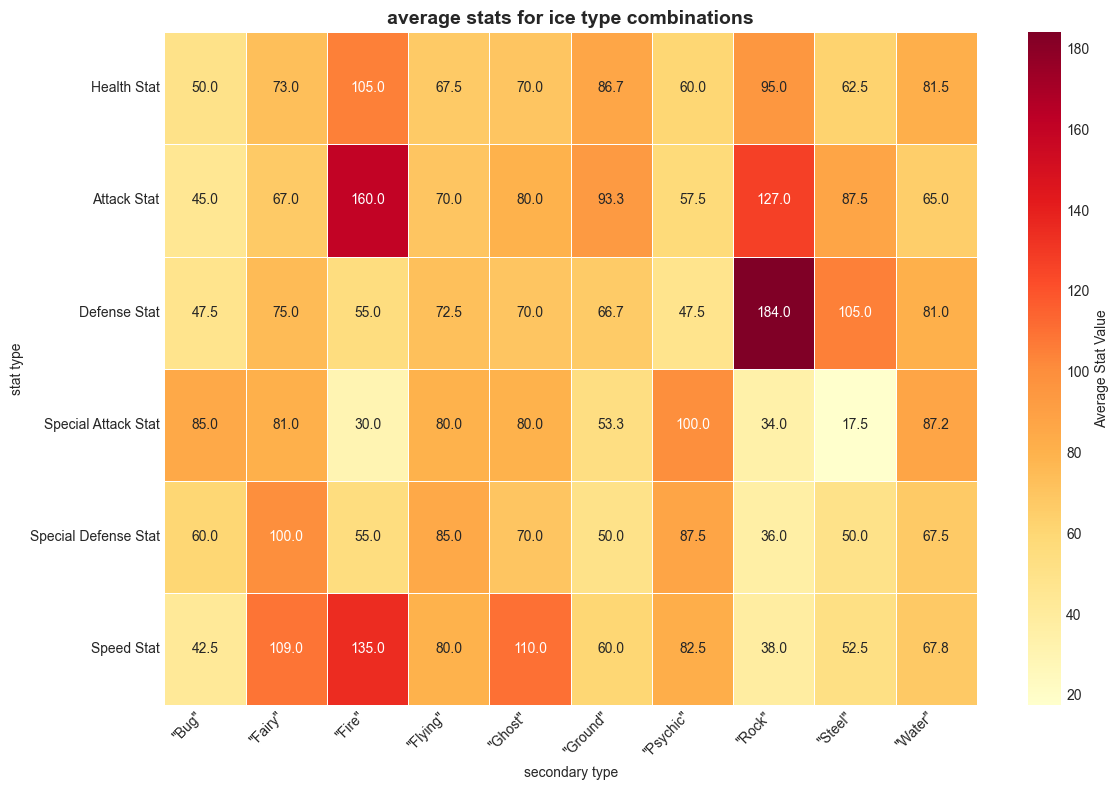

ice combinations: 10 secondary types
  highest average total stats: ice + fire



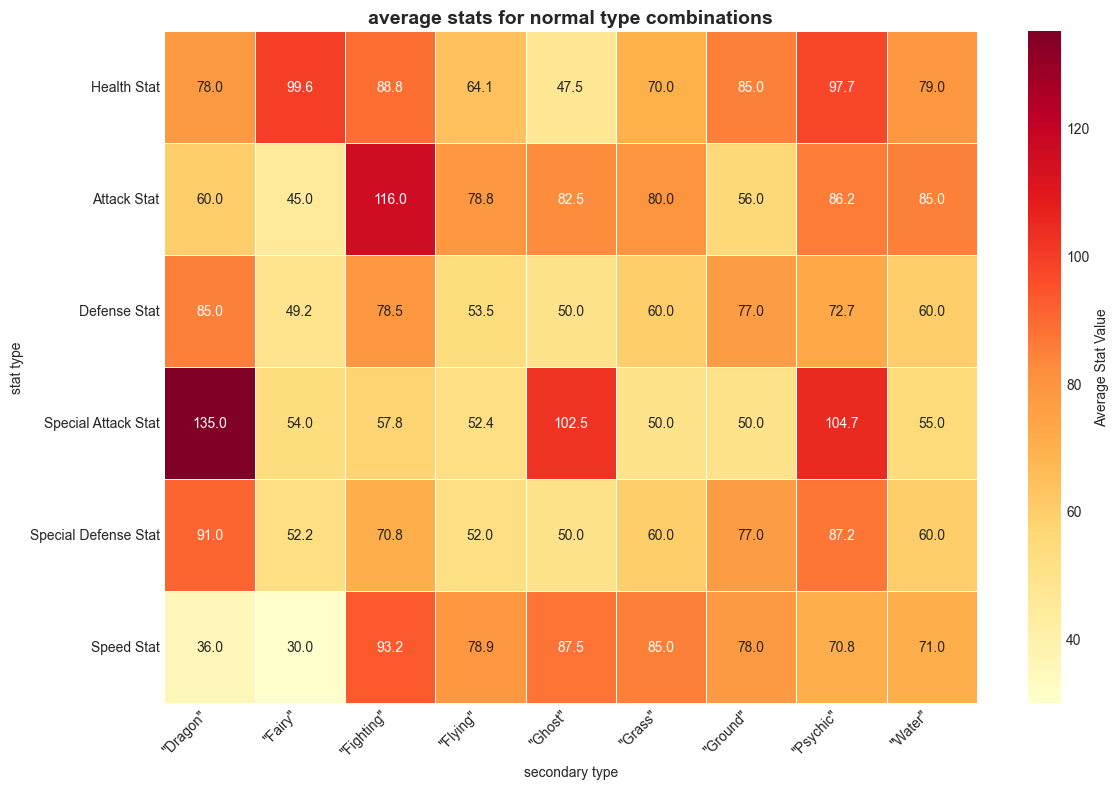

normal combinations: 9 secondary types
  highest average total stats: normal + psychic



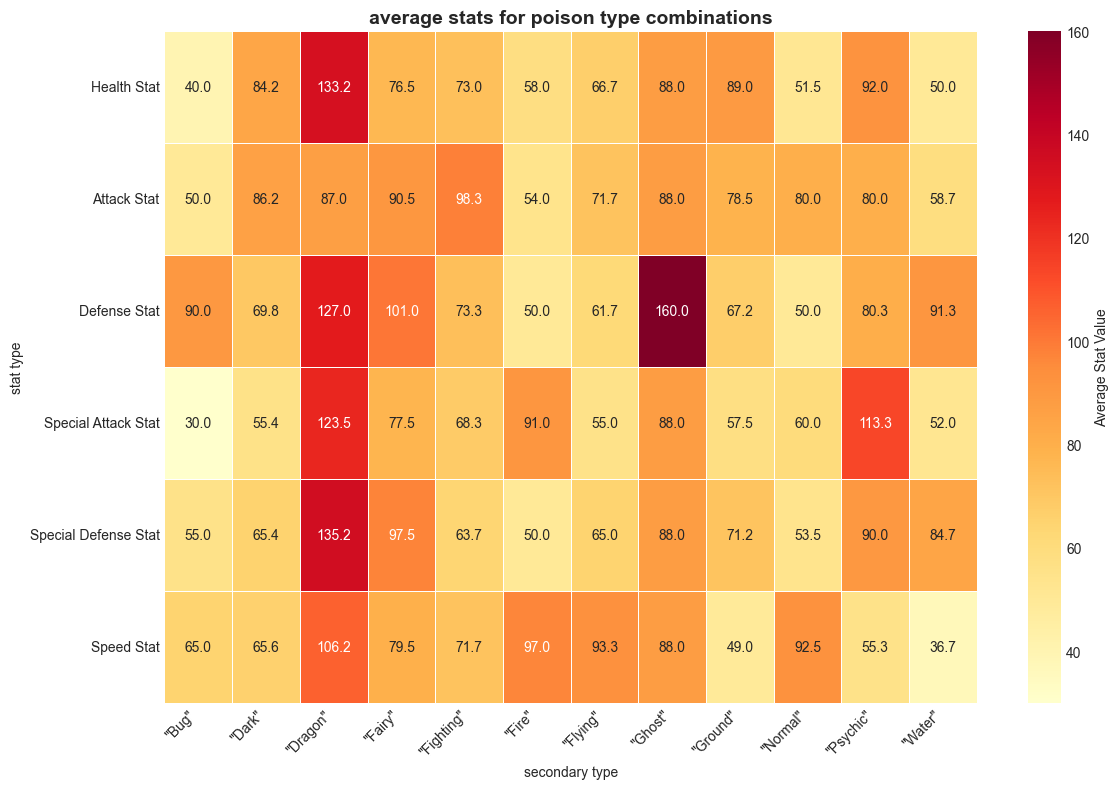

poison combinations: 12 secondary types
  highest average total stats: poison + dragon



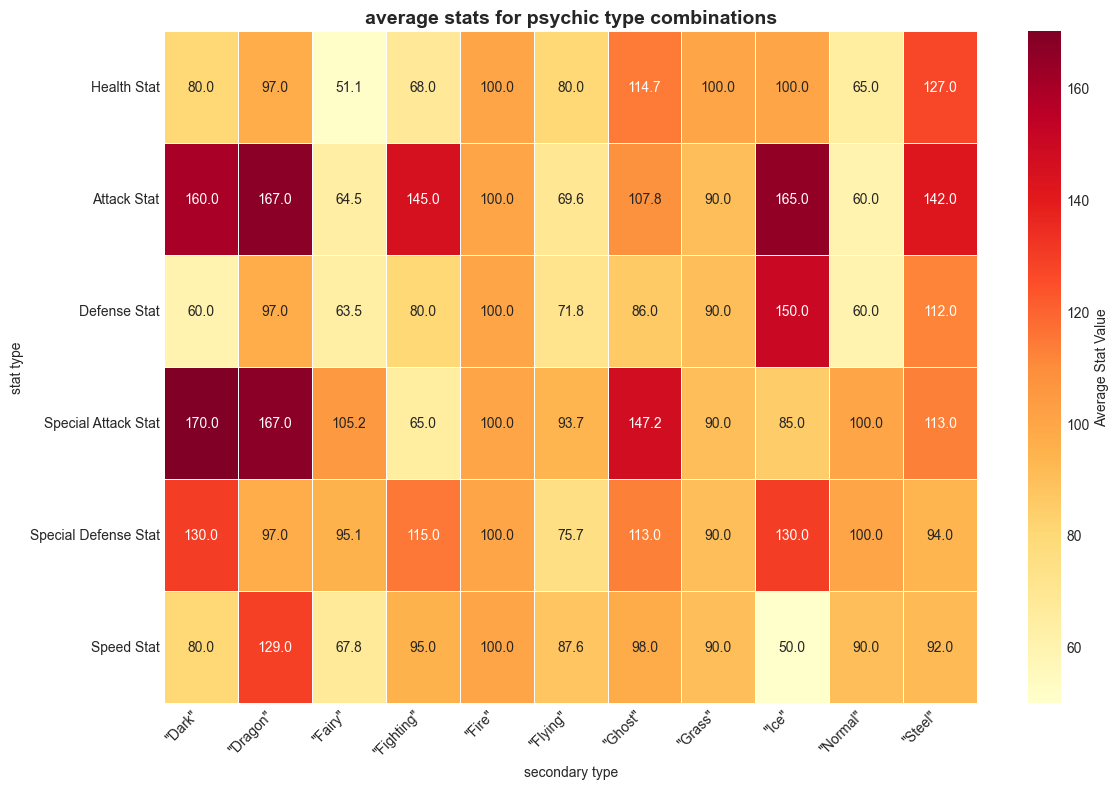

psychic combinations: 11 secondary types
  highest average total stats: psychic + dragon



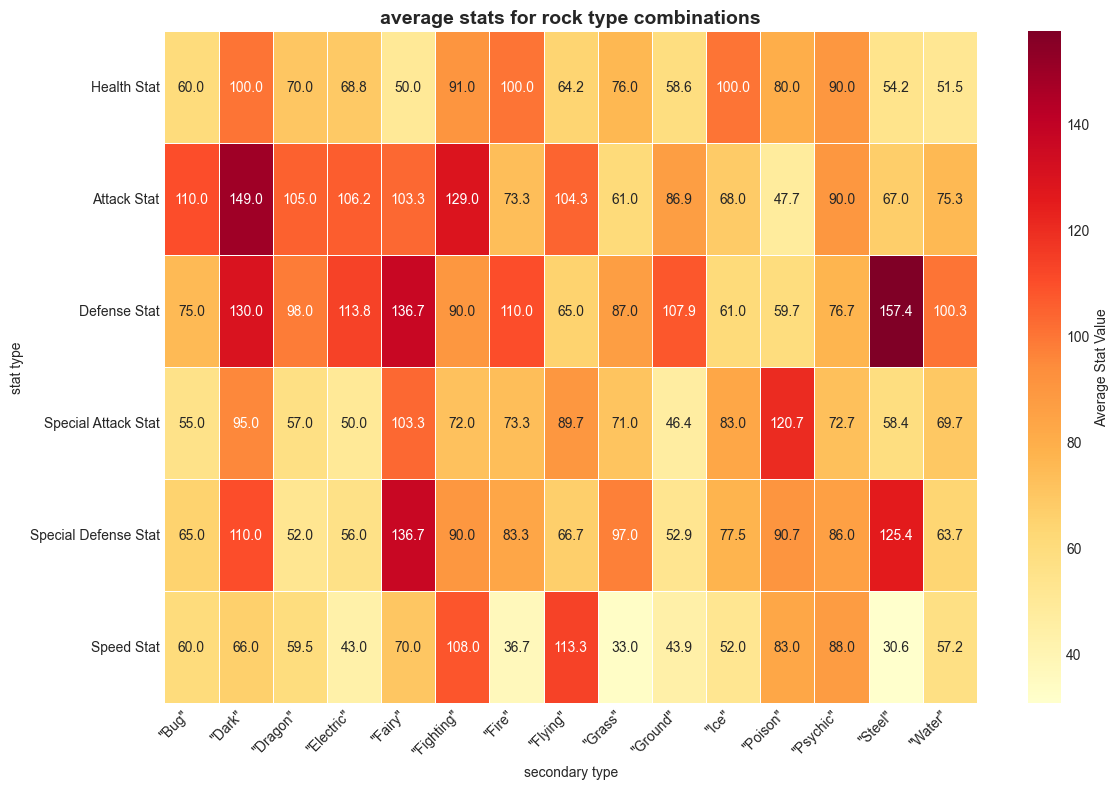

rock combinations: 15 secondary types
  highest average total stats: rock + dark



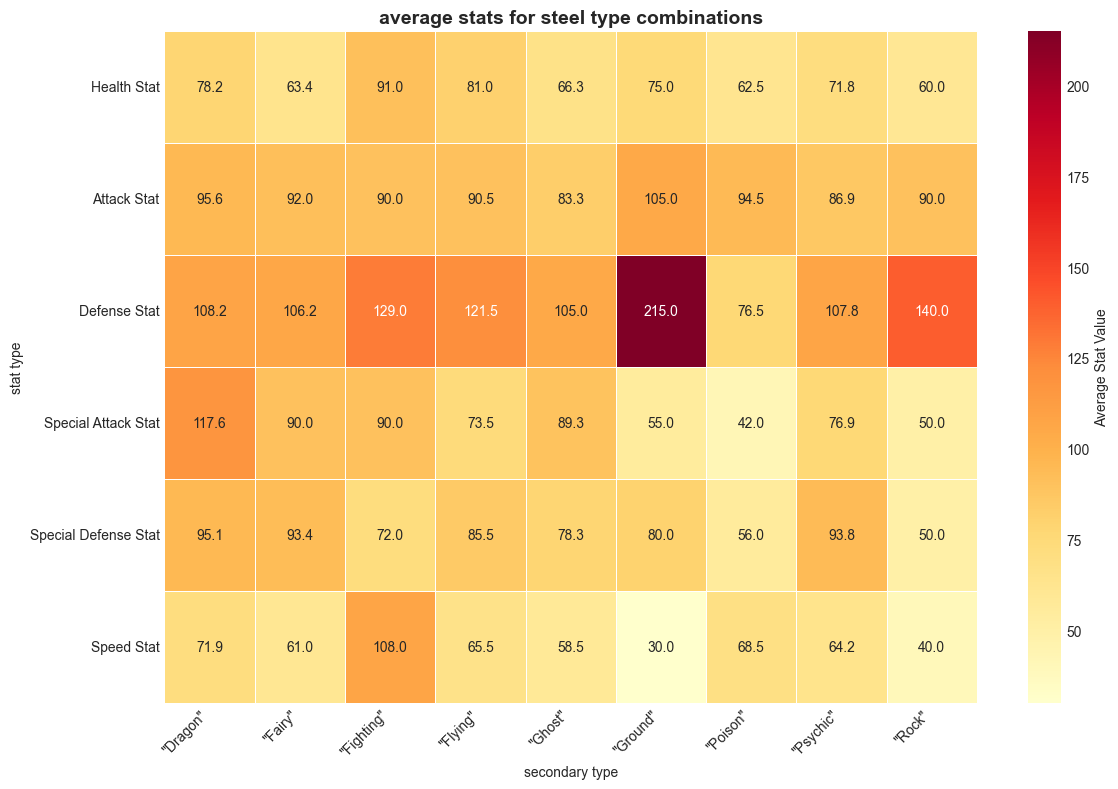

steel combinations: 9 secondary types
  highest average total stats: steel + fighting



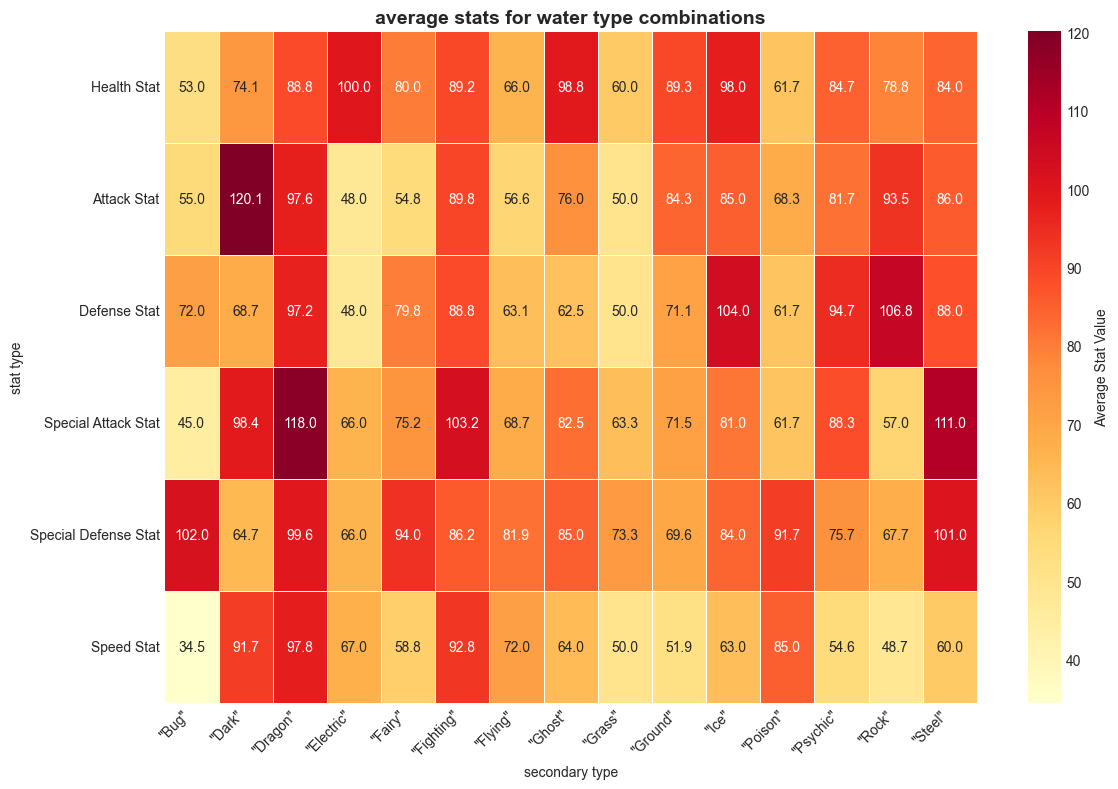

water combinations: 15 secondary types
  highest average total stats: water + dragon


type combination analysis
most frequent type combinations:
• bug + flying: 36 pokemon
• normal + flying: 31 pokemon
• grass + poison: 16 pokemon
• bug + poison: 12 pokemon
• rock + flying: 12 pokemon
• ghost + grass: 11 pokemon
• water + ground: 11 pokemon
• grass + dragon: 10 pokemon
• psychic + flying: 10 pokemon
• psychic + fairy: 10 pokemon
• water + dark: 9 pokemon
• steel + psychic: 8 pokemon
• electric + flying: 8 pokemon
• normal + grass: 8 pokemon
• steel + dragon: 8 pokemon
• fire + flying: 8 pokemon
• water + flying: 7 pokemon
• grass + fighting: 7 pokemon
• fire + fighting: 7 pokemon
• grass + flying: 7 pokemon

secondary type preferences by primary type


KeyError: "['Is Legendary'] not in index"

In [25]:
# analyze how different types relate to stats
# separate analysis for single-type and dual-type pokemon

# single-type pokemon analysis
single_type = df[df['Secondary Type'].isna()]
dual_type = df[~df['Secondary Type'].isna()]

print(f"single-type pokemon: {len(single_type)}")
print(f"dual-type pokemon: {len(dual_type)}")
print()

# single-type pokemon: average stats by type
print("single-type pokemon: average stats by type")
single_type_stats = single_type.groupby('Primary Type')[stats_cols].mean()
plt.figure(figsize=(16, 10))
sns.heatmap(single_type_stats.T, annot=True, fmt='.1f', cmap='YlOrRd',
            linewidths=0.5, cbar_kws={'label': 'Average Stat Value'})
plt.title('average stats by type (single-type pokemon only)', fontsize=14, fontweight='bold')
plt.xlabel('pokemon type')
plt.ylabel('stat type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('figures/correlation/single_type_stats_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# dual-type pokemon: average stats by type combination (one chart per primary type)
print("\ndual-type pokemon: stats by type combination")

# get primary types that have dual-type pokemon
dual_primary_types = sorted(dual_type['Primary Type'].unique())

for primary_type in dual_primary_types:
    # get all combinations for this primary type
    primary_combos = dual_type[dual_type['Primary Type'] == primary_type]
    
    if len(primary_combos) > 0:
        # group by secondary type for this primary type
        combo_stats = primary_combos.groupby('Secondary Type')[stats_cols].mean()
        
        if not combo_stats.empty:
            # clean type name by removing quotes
            clean_primary = primary_type.strip('"').lower()
            
            plt.figure(figsize=(12, 8))
            sns.heatmap(combo_stats.T, annot=True, fmt='.1f', cmap='YlOrRd',
                        linewidths=0.5, cbar_kws={'label': 'Average Stat Value'})
            plt.title(f'average stats for {clean_primary} type combinations', fontsize=14, fontweight='bold')
            plt.xlabel('secondary type')
            plt.ylabel('stat type')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.savefig(f'figures/correlation/{clean_primary}_combinations_stats_heatmap.png', dpi=300, bbox_inches='tight')
            plt.show()
            
            # print summary for this primary type
            print(f"{clean_primary} combinations: {len(combo_stats)} secondary types")
            top_secondary = combo_stats.mean(axis=1).idxmax()
            print(f"  highest average total stats: {clean_primary} + {top_secondary.strip('\"').lower()}")
            print()

# type combination analysis - most common pairings
print("\ntype combination analysis")
combination_stats = dual_type.groupby(['Primary Type', 'Secondary Type'])[stats_cols + ['Base Stat Total']].mean()
combination_counts = dual_type.groupby(['Primary Type', 'Secondary Type']).size()

# top combinations by frequency
top_combinations = combination_counts.sort_values(ascending=False).head(20)
print("most frequent type combinations:")
for (primary, secondary), count in top_combinations.items():
    print(f"• {primary.strip('\"').lower()} + {secondary.strip('\"').lower()}: {count} pokemon")

# analyze secondary types for each primary type
print("\nsecondary type preferences by primary type")
secondary_preferences = []
for primary in dual_type['Primary Type'].unique():
    primary_combos = dual_type[dual_type['Primary Type'] == primary]
    secondary_dist = primary_combos['Secondary Type'].value_counts()
    total_primary = len(primary_combos)

    for secondary, count in secondary_dist.items():
        secondary_preferences.append({
            'primary type': primary.strip('"').lower(),
            'secondary type': secondary.strip('"').lower(),
            'count': count,
            'percentage': round(count / total_primary * 100, 1),
            'avg total stats': round(combination_stats.loc[(primary, secondary), 'Base Stat Total'], 1)
        })

preferences_df = pd.DataFrame(secondary_preferences).sort_values(['primary type', 'count'], ascending=[True, False])
preferences_df

# calculate overall dual-type stats for summary tables
dual_primary_stats = dual_type.groupby('Primary Type')[stats_cols].mean()
dual_secondary_stats = dual_type.groupby('Secondary Type')[stats_cols].mean()

# legendary correlation analysis
legendary_corr = df[['Is Legendary'] + stats_cols].corr()['Is Legendary'].drop('Is Legendary')
print(f"\nlegendary correlations")
print("correlation between legendary status and stats:")
for stat, corr in legendary_corr.items():
    print(f"• {stat[:-5].lower()}: {corr:.3f}")

# dual-type analysis
dual_type_corr = df[['Has Secondary Type'] + stats_cols].corr()['Has Secondary Type'].drop('Has Secondary Type')
print(f"\ndual-type correlations")
print("correlation between dual-type status and stats:")
for stat, corr in dual_type_corr.items():
    print(f"• {stat[:-5].lower()}: {corr:.3f}")

# visualization of legendary correlations
# sort correlations by value (descending) for better visualization
legendary_corr_sorted = legendary_corr.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
bars = plt.bar(range(len(legendary_corr_sorted)), legendary_corr_sorted.values, color=presentation_palette[2])
plt.xticks(range(len(legendary_corr_sorted)), [s.replace(' Stat', '').lower() for s in legendary_corr_sorted.index], rotation=45, ha='right')
plt.title('correlation: legendary status vs individual stats', fontsize=14, fontweight='bold')
plt.ylabel('correlation coefficient')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# add value labels
for bar, corr in zip(bars, legendary_corr_sorted.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{corr:.3f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('figures/correlation/legendary_stats_correlation_bar.png', dpi=300, bbox_inches='tight')
plt.show()


## Correlation Analysis Summary

In [ ]:
# create summary tables for correlation analysis

# 1. stat relationships table
stat_relationships = []
key_pairs = [
    ('Special Attack Stat', 'Special Defense Stat'),
    ('Attack Stat', 'Defense Stat'),
    ('Health Stat', 'Defense Stat'),
    ('Health Stat', 'Attack Stat'),
    ('Special Attack Stat', 'Speed Stat')
]

for x_stat, y_stat in key_pairs:
    corr = df[x_stat].corr(df[y_stat])
    strength = "strong" if abs(corr) > 0.7 else "moderate" if abs(corr) > 0.5 else "weak"
    direction = "positive" if corr > 0 else "negative"
    stat_relationships.append({
        'stat pair': f'{x_stat[:-5]} vs {y_stat[:-5]}',
        'correlation (r)': round(corr, 3),
        'strength': strength,
        'direction': direction
    })

stat_relationships_df = pd.DataFrame(stat_relationships)
print("stat relationships")
display(stat_relationships_df)

# 2. type specializations table - single type pokemon
single_type_specializations = []
for stat in stats_cols:
    best_type = single_type_stats[stat].idxmax()
    best_value = single_type_stats[stat].max()
    single_type_specializations.append({
        'stat': stat[:-5],
        'best single type': best_type,
        'average value': round(best_value, 1)
    })

single_type_specializations_df = pd.DataFrame(single_type_specializations)
print("\nsingle-type pokemon specializations")
display(single_type_specializations_df)

# 3. type specializations table - dual type pokemon (primary)
dual_primary_specializations = []
for stat in stats_cols:
    best_type = dual_primary_stats[stat].idxmax()
    best_value = dual_primary_stats[stat].max()
    dual_primary_specializations.append({
        'stat': stat[:-5],
        'best primary type (dual)': best_type,
        'average value': round(best_value, 1)
    })

dual_primary_specializations_df = pd.DataFrame(dual_primary_specializations)
print("\ndual-type pokemon primary type specializations")
display(dual_primary_specializations_df)

# 4. type specializations table - dual type pokemon (secondary)
dual_secondary_specializations = []
for stat in stats_cols:
    best_type = dual_secondary_stats[stat].idxmax()
    best_value = dual_secondary_stats[stat].max()
    dual_secondary_specializations.append({
        'stat': stat[:-5],
        'best secondary type (dual)': best_type,
        'average value': round(best_value, 1)
    })

dual_secondary_specializations_df = pd.DataFrame(dual_secondary_specializations)
print("\ndual-type pokemon secondary type specializations")
display(dual_secondary_specializations_df)

# 5. legendary patterns table
legendary_patterns = []
for stat, corr in legendary_corr.items():
    legendary_patterns.append({
        'stat': stat[:-5],
        'correlation with legendary': round(corr, 3)
    })

legendary_patterns_df = pd.DataFrame(legendary_patterns)
print("\nlegendary patterns")
display(legendary_patterns_df)

# 6. dual-type patterns table
dual_type_patterns = []
for stat, corr in dual_type_corr.items():
    dual_type_patterns.append({
        'stat': stat[:-5],
        'correlation with dual-type': round(corr, 3)
    })

dual_type_patterns_df = pd.DataFrame(dual_type_patterns)
print("\ndual-type patterns")
display(dual_type_patterns_df)

# 7. combined stat correlations table
combined_correlations = []
for stat in stats_cols:
    stat_name = stat[:-5]
    legendary_corr_val = legendary_corr[stat]
    dual_type_corr_val = dual_type_corr[stat]
    combined_correlations.append({
        'stat': stat_name,
        'legendary correlation': round(legendary_corr_val, 3),
        'dual-type correlation': round(dual_type_corr_val, 3),
        'legendary strength': "strong" if abs(legendary_corr_val) > 0.3 else "moderate" if abs(legendary_corr_val) > 0.2 else "weak",
        'dual-type strength': "strong" if abs(dual_type_corr_val) > 0.15 else "moderate" if abs(dual_type_corr_val) > 0.1 else "weak"
    })

combined_correlations_df = pd.DataFrame(combined_correlations)
print("\ncombined stat correlations")
display(combined_correlations_df)

# presentation insights table
presentation_insights = pd.DataFrame({
    'presentation point': [
        'correlation heatmap (full matrix)',
        'separate single/dual type analysis',
        'type combination frequencies',
        'secondary type preferences by primary',
        'legendary stat correlations',
        'speed independence pattern'
    ],
    'purpose': [
        'show complete stat interdependencies',
        'compare type distributions between single and dual pokemon',
        'highlight most common type pairings',
        'show how primary types pair with secondary types',
        'emphasize legendary pokemon superiority',
        'note speed\'s unique independence for strategy'
    ]
})
print("\npresentation insights")
presentation_insights